<a href="https://colab.research.google.com/github/sevvalyildiz/DeepLearning/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas

In [0]:
pip install  scikit-learn

In [0]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import os


In [0]:
from google.colab import files
uploaded = files.upload()

Saving SosyalMedyaReklamKampanyası.csv to SosyalMedyaReklamKampanyası.csv


In [0]:
#http://www.datascience.istanbul/2017/06/26/k-en-yakin-komsu-k-nearest-neighbor-siniflandirma-python-ornek-uygulama/
dataset = pd.read_csv('SosyalMedyaReklamKampanyası.csv')
#eşsiz rakam, Cinsiyet, Yaş, Tahmini Gelir yıllık bagımsız burada sadece satın aldı mı bagımlı

In [0]:
#herefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance
#gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features..

In [0]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [0]:
# x bagımsız zdeğişken yas v maaş y bagımlı degişken 


In [0]:
!pip install scikit-learn
!pip  install  tensorflow


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 

In [0]:
#Bağımsız değişkenlerden yaş ile tahmini gelir aynı birimde olmadığı için feature scaling uygulayacağız.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
#K En Yakın Komşu Modeli Oluşturmak ve Eğitmek
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)


#n_neighbors kullanılacak komşu sayısı.
#mesafeye dayalı yöntem kullanacak isek minkowski seçiyoruz. p ise hangi mesafe yöntemini k kullanacağımız, 2 öklid mesafesini kullan demektir.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#test seti ile atahmin yapmak 
#Ayırdığımız test setimizi (X_test) kullanarak oluşturduğumuz model ile tahmin yapalım  ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım
y_pred = classifier.predict(X_test)

 #y_test (gerçek veri) ile modelin tahmin ettiği y_pred bir görüntü bulunuyor.

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [0]:
# 4+3 =7 tane yanlış yapılış diğerler doğru
############################ GRAFİK#######################

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


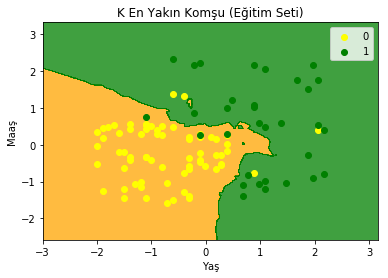

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('K En Yakın Komşu (Eğitim Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


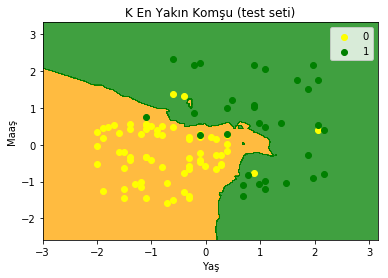

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('K En Yakın Komşu (test seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

In [0]:
################# LOGİSTİC REGRESSİON ##########

In [0]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


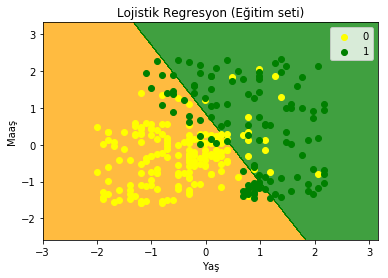

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('ORANGE', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Lojistik Regresyon (Eğitim seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

In [0]:
###### TEST VERİSİ#######

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


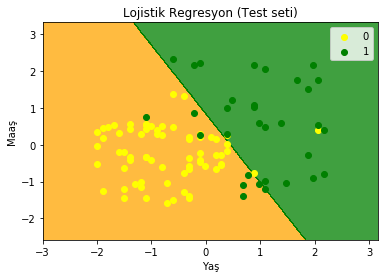

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('ORANGE', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Lojistik Regresyon (Test seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()


In [0]:
'Grafiğimizde üç değişken Maaş ve yaş eksenleri İlk satır matplotlib kütüphanesi colors modülü ListedColormap sınıfını indiriyoruz. 
İkinci satırda X_set, y_set diye iki değişken oluşturduk. 
Bunun sebebi tüm kodları değiştirmeden buraya eğitim ve test değişkenlerimizi yazdığımızda grafik hemen çizilsin. 
np.meshgrid() ile grafiğin sınırlarını ve çözünürlüğünü ayarladık. plt.contourf() ile SatinAldiMi niteliği 0 değeri alan kayıtlar sarı, 1 olanları yeşil nokta ile gösteriyoruz. 
for döngüsü ile tüm y değerlerini dolaşıp nereye konumlanacağını (plt.scatter()) saçılma diyagramı ile çiziyoruz. plt.legent() ile sağ üst köşedeki bilgi kutusunu yazdırıyoruz.'

In [0]:
#################SVM Modeli  ##########

#Sınıflandırma notları serimize devam ediyoruz. Support Vector Machine (Destek Vektör Makinesi desek nasıl durur bilmiyorum) sınıflandırma için kullanılan yöntemlerden birisidir.  Temel olarak iki sınıfı bir doğru veya düzlem ile birbirinden ayırmaya çalışır. Bu ayırmayı da sınırdaki elemanlara göre yapar.

In [0]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test=train_test_split(X,y,test_size =0.25, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[66  2]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


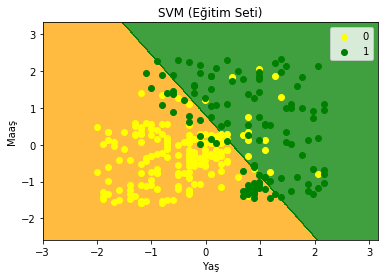

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Eğitim Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving aKopya.dat to aKopya.dat


In [0]:
dataset = pd.read_csv('aKopya.dat')

In [0]:
dataset

,session_ID,timestamp,Item_ID,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1
5,140806,2014-04-07T09:22:28.132Z,214668193,523,1
6,140806,2014-04-07T09:22:28.176Z,214587399,1046,1
7,140806,2014-04-07T09:22:28.219Z,214586690,837,1
8,140806,2014-04-07T09:22:28.268Z,214774667,1151,1
9,140806,2014-04-07T09:22:28.280Z,214578823,1046,1


In [0]:
dataset['state']=['0'
                                      if kalorii<2 
                                      else '1'
                                      for kalorii in dataset.quantity]
                                     
dataset

,session_ID,timestamp,Item_ID,price,quantity,state
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1,0
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1,0
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1,0
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1,0
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1,0
5,140806,2014-04-07T09:22:28.132Z,214668193,523,1,0
6,140806,2014-04-07T09:22:28.176Z,214587399,1046,1,0
7,140806,2014-04-07T09:22:28.219Z,214586690,837,1,0
8,140806,2014-04-07T09:22:28.268Z,214774667,1151,1,0
9,140806,2014-04-07T09:22:28.280Z,214578823,1046,1,0


In [0]:
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, 5].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[181   0]
 [  0  69]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


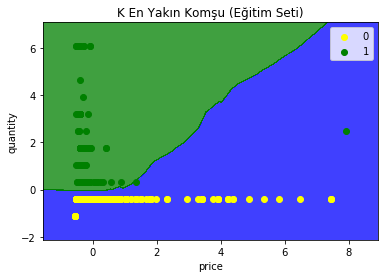

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('K En Yakın Komşu (Eğitim Seti)')
plt.xlabel('price')
plt.ylabel('quantity')
plt.legend()
plt.show()

In [0]:
##################### kerasss ####################

In [0]:
!pip install  theano

In [0]:
!pip install keras

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

11501568/11490434 [==============================] - 2s 0us/step


In [0]:
'Katmanları yerleştirirken önemli olan her bir katmanın giriş boyutunun (input_dim) bir önceki katmanın çıkış boyutuna eşit olması

'X_train.shape[1] değeri X_train matrisinde kaç kolon olduğunu (784) veriyor.
'tanh (hiperbolik tanjant) şöyle bir aktivasyon fonksiyonu: Rectified Linear Unit, yani kısaca ReLu. '

In [0]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                output_dim = 50,
                init =   'uniform',
                activation = 'tanh'))
from keras.layers.core import Activation
from keras.layers.core import Dropout

model.add(Dense(50, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(50, init='uniform'))
model.add(Activation('relu'))
from keras.utils.np_utils import to_categorical
y_train_ohe = to_categorical(y_train)

model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))


sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd)

model.fit(X_train,
          y_train_ohe,
          nb_epoch = 50,
          batch_size = 500,
          validation_split = 0.1,
          verbose = 1)


y_test_predictions = model.predict_classes(X_test, verbose = 1)
import numpy as np
correct = np.sum(y_test_predictions ==  y_test)
print ('Test Accuracy: %.2f%%' % (correct/float(y_test.shape[0])*100.0) )

In [0]:
############### 1- Data Preprocessing#############33

In [0]:
Toggle navigation 
Machine-Learning   1- Data Preprocessing
# Veri Ön işleme
# Gerekli kütüphanelerin Yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
url ='https://raw.githubusercontent.com/cagriemreakin/Machine-Learning/master/1-%20Data%20Preprocessing/dataset.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
# Kayıp Değerler
from sklearn.preprocessing import Imputer #Imputer Class' ının yüklenmesi
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) 
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
# Kategorik Değerler
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
X = ohe.fit_transform(X).toarray()
# Diğer kategorik değer ise, dependent variable olan Purchase sütunu 
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
# Training set and Test set olarak ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train
array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+01,   6.37777778e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.70000000e+01,   6.70000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.70000000e+01,   4.80000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.87777778e+01,   5.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.80000000e+01,   7.90000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.80000000e+01,   6.10000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.40000000e+01,   7.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.50000000e+01,   5.80000000e+04]])
y_train
array([1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)
X_test
array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+01,   5.40000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+01,   8.30000000e+04]])
y_test
array([0, 0], dtype=int64)
# Feature Scaling (Özellik Ölçekleme)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


SyntaxError: ignored